In [7]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import LabelEncoder

In [ ]:
df = pd.read_csv('salary_data.csv')
²print(df.head)

<bound method NDFrame.head of           id                role  years_experience     degree company_size  \
0    SAL0000         BI Engineer               8.2        PhD          Mid   
1    SAL0001     Product Manager               4.6  Bachelors          Mid   
2    SAL0002      Data Scientist               2.8  Bachelors        Small   
3    SAL0003        Data Analyst               4.5    Masters        Small   
4    SAL0004         QA Engineer               6.7        PhD          Mid   
..       ...                 ...               ...        ...          ...   
195  SAL0195  Frontend Developer               4.9  No Degree          Mid   
196  SAL0196      Data Scientist               2.6    Masters   Enterprise   
197  SAL0197   Backend Developer               1.0    Masters   Enterprise   
198  SAL0198   Backend Developer               4.6  Bachelors        Small   
199  SAL0199      Data Scientist               7.9  Bachelors   Enterprise   

       location   level  salary_m

In [10]:
df.drop('id', axis=1, inplace=True)
df = df.dropna(subset=['years_experience', 'salary_mad'])
df.columns

Index(['role', 'years_experience', 'degree', 'company_size', 'location',
       'level', 'salary_mad'],
      dtype='object')

In [14]:
df['role'] = df['role'].str.title()
df['degree'] = df['degree'].str.title()
df['company_size'] = df['company_size'].str.title()
df['location'] = df['location'].str.title()
df['level'] = df['level'].str.title()
print(df.head)

<bound method NDFrame.head of                    role  years_experience     degree company_size    location  \
0           Bi Engineer               8.2        Phd          Mid  Casablanca   
1       Product Manager               4.6  Bachelors          Mid         Fes   
2        Data Scientist               2.8  Bachelors        Small  Casablanca   
3          Data Analyst               4.5    Masters        Small       Rabat   
4           Qa Engineer               6.7        Phd          Mid     Tangier   
..                  ...               ...        ...          ...         ...   
195  Frontend Developer               4.9  No Degree          Mid       Rabat   
196      Data Scientist               2.6    Masters   Enterprise  Casablanca   
197   Backend Developer               1.0    Masters   Enterprise  Casablanca   
198   Backend Developer               4.6  Bachelors        Small      Remote   
199      Data Scientist               7.9  Bachelors   Enterprise     Tangier  

In [15]:
level_order = ['Intern', 'Junior', 'Mid', 'Senior', 'Lead']
company_size_order = ['Small', 'Mid', 'Large', 'Enterprise']
degree_order = ['No Degree', 'Bachelors', 'Masters', 'Phd']

df['level_encoded'] = df['level'].map({level: i for i, level in enumerate(level_order)})
df['company_size_encoded'] = df['company_size'].map({size: i for i, size in enumerate(company_size_order)})
df['degree_encoded'] = df['degree'].map({deg: i for i, deg in enumerate(degree_order)}) 
print(df.head)

<bound method NDFrame.head of                    role  years_experience     degree company_size    location  \
0           Bi Engineer               8.2        Phd          Mid  Casablanca   
1       Product Manager               4.6  Bachelors          Mid         Fes   
2        Data Scientist               2.8  Bachelors        Small  Casablanca   
3          Data Analyst               4.5    Masters        Small       Rabat   
4           Qa Engineer               6.7        Phd          Mid     Tangier   
..                  ...               ...        ...          ...         ...   
195  Frontend Developer               4.9  No Degree          Mid       Rabat   
196      Data Scientist               2.6    Masters   Enterprise  Casablanca   
197   Backend Developer               1.0    Masters   Enterprise  Casablanca   
198   Backend Developer               4.6  Bachelors        Small      Remote   
199      Data Scientist               7.9  Bachelors   Enterprise     Tangier  

In [ ]:
nominal_cols = ['role', 'location']

for col in nominal_cols:
    le = LabelEncoder()
    df[col + '_encoded'] = le.fit_transform(df[col])
categorical_cols = ['role', 'degree', 'company_size', 'location', 'level']
feature_cols = ['years_experience'] + [col + '_encoded' for col in categorical_cols]
X = df[feature_cols]
y = df['salary_mad']

<bound method NDFrame.head of                    role  years_experience     degree company_size    location  \
0           Bi Engineer               8.2        Phd          Mid  Casablanca   
1       Product Manager               4.6  Bachelors          Mid         Fes   
2        Data Scientist               2.8  Bachelors        Small  Casablanca   
3          Data Analyst               4.5    Masters        Small       Rabat   
4           Qa Engineer               6.7        Phd          Mid     Tangier   
..                  ...               ...        ...          ...         ...   
195  Frontend Developer               4.9  No Degree          Mid       Rabat   
196      Data Scientist               2.6    Masters   Enterprise  Casablanca   
197   Backend Developer               1.0    Masters   Enterprise  Casablanca   
198   Backend Developer               4.6  Bachelors        Small      Remote   
199      Data Scientist               7.9  Bachelors   Enterprise     Tangier  

C:\Users\legende\AppData\Local\Temp\ipykernel_9520\4294399276.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=df, x="level", y="salary_mad", palette="Spectral")


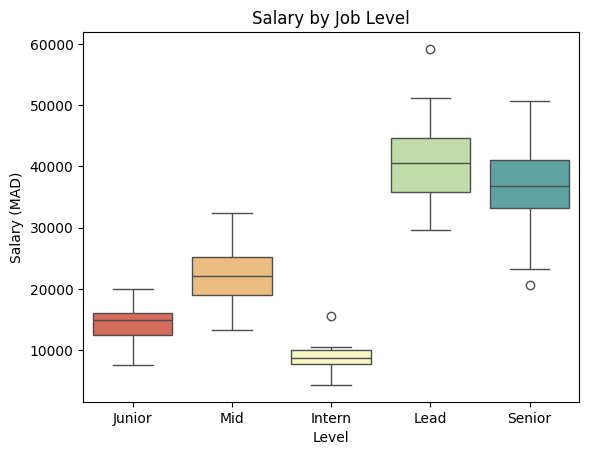

In [17]:
plt.figure()
sns.boxplot(data=df, x="level", y="salary_mad", palette="Spectral")
plt.title("Salary by Job Level")
plt.xlabel("Level")
plt.ylabel("Salary (MAD)")
plt.show()

C:\Users\legende\AppData\Local\Temp\ipykernel_9520\1028024116.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=df, x="degree", y="salary_mad", palette="Set2")


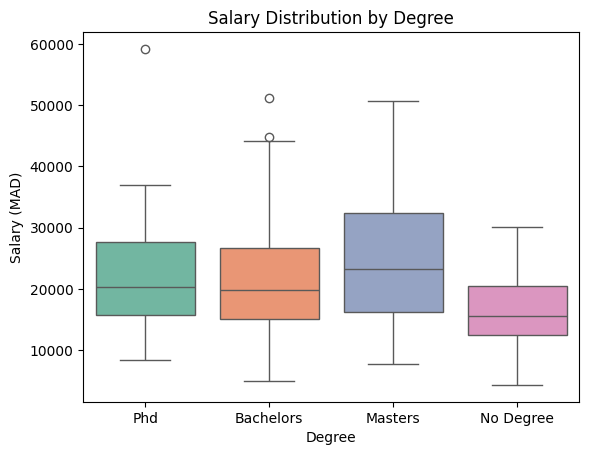

In [18]:
plt.figure()
sns.boxplot(data=df, x="degree", y="salary_mad", palette="Set2")
plt.title("Salary Distribution by Degree")
plt.xlabel("Degree")
plt.ylabel("Salary (MAD)")
plt.show()

C:\Users\legende\AppData\Local\Temp\ipykernel_9520\2346529909.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=df, x="company_size", y="salary_mad", palette="coolwarm")


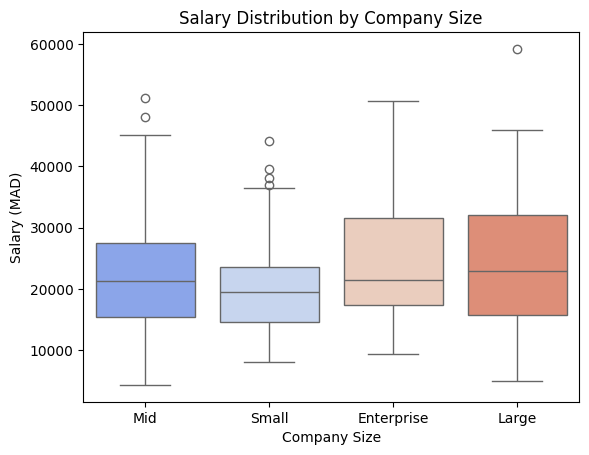

In [19]:
plt.figure()
sns.boxplot(data=df, x="company_size", y="salary_mad", palette="coolwarm")
plt.title("Salary Distribution by Company Size")
plt.xlabel("Company Size")
plt.ylabel("Salary (MAD)")
plt.show()

C:\Users\legende\AppData\Local\Temp\ipykernel_9520\4191758639.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=df, x="location", y="salary_mad", palette="coolwarm")


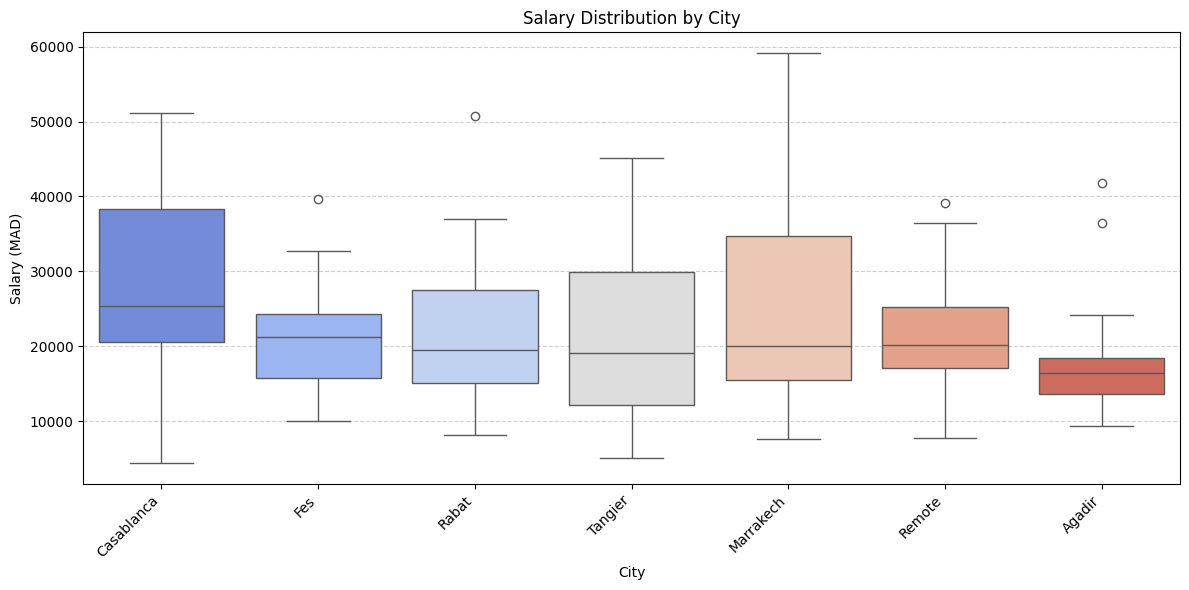

In [20]:
plt.figure(figsize=(12, 6))
sns.boxplot(data=df, x="location", y="salary_mad", palette="coolwarm")
plt.title("Salary Distribution by City")
plt.xlabel("City")
plt.ylabel("Salary (MAD)")
plt.xticks(rotation=45, ha='right')
plt.grid(axis='y', linestyle='--', alpha=0.6)
plt.tight_layout()
plt.show()

In [27]:

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.3, random_state=2
)

model = LinearRegression()
model.fit(X_train, y_train)

y_pred = model.predict(X_test)

r2 = r2_score(y_test, y_pred)
print("Model Accuracy:", round(r2, 3))


Model Accuracy: 0.847
